In [1]:
import pandas as pd
import numpy as np
import os
import datetime

In [2]:
#reading data.csv
df = pd.read_csv(r'C:\Users\Jank The Tank\Desktop\assignment\data.csv', encoding='cp1252')

In [3]:
#df1.dtypes
#converting InvoiceDate from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

# df1['InvoiceDate'].min() = 2010-12-01 08:26:00, df1['InvoiceDate'].max() = 2011-12-09 12:50:00
# We would analyse quantity of different products on monthly basis
df['inMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [4]:
len(df), len(df[df['Quantity'] <= 0])

(541909, 10624)

In [5]:
### Negative analysis
negQuant = df[df['Quantity'] <= 0]
negUP = df[df['UnitPrice'] <= 0]

### Negative Quantity might represent those product which were returned back by the customers
### We are excluding Stocks with Zero and Negative UnitPrice

#df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

### Analysing Country wise

In [6]:
con = df.groupby(['Country'])['Quantity'].agg(sum).reset_index().sort_values('Quantity',ascending=False).reset_index(drop=True)
con.columns = ['Country', 'TotalQuantity']
con["%"] = con['TotalQuantity']*100/con['TotalQuantity'].sum()
#con
#Observations: 1. 82% of our sales occurs in UK, 2. 18% in other countries

In [7]:
#for Optimising storage area, we will check 2 things
#1. which products should we store which will generate the BEST REVENUE.
#2. how much quantity of SELECTED PRODUCTS should we store on monthly basis.

## 1. Which products should we store which will generate the BEST REVENUE.

In [8]:
print(df.Description.nunique(),df.StockCode.nunique())

4042 3938


In [9]:
#print(uk.Description.nunique(),uk.StockCode.nunique())
# Observations:
# Unique number of StockCode = 3938, Unique number of Description = 4042  
# It means some of the StockCode have multiple Description

In [10]:
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [11]:
df1 = df.groupby(['StockCode','inMonth'])['TotalCost'].sum().reset_index()

df1 = df1.pivot_table(columns='inMonth',index='StockCode',values='TotalCost', fill_value=0)

cl = df1.columns.tolist()

In [12]:
df1['TotalRevenue'] = df1[cl].sum(axis=1)
df1['%_of_TotalRevenue'] = df1['TotalRevenue']*100/df1['TotalRevenue'].sum()

df1['MonthlyAvg'] = df1[cl].mean(axis=1)
df1['Median'] = df1[cl].median(axis=1)

df1 = df1.sort_values('TotalRevenue',ascending=False)

In [13]:
df1['Cumulative%'] = df1['%_of_TotalRevenue'].cumsum()

In [14]:
df1
### Some of the StockCodes have negative revenue (because of negative quantity)
### these will be filtered out when we will choose the best revenue generating stockcodes

inMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,TotalRevenue,%_of_TotalRevenue,MonthlyAvg,Median,Cumulative%
StockCode,,,,,,,,,,,,,,,,,,
DOT,24671.19,13918.53,10060.57,11829.71,7535.38,10229.30,11848.66,12841.00,13400.52,15177.400,17955.13,36905.40,19872.69,206245.480,2.111036,15865.036923,13400.52,2.111036
22423,26897.36,11742.50,10466.04,16830.60,14280.90,12217.27,9466.39,13777.56,8406.30,9315.030,12660.84,12798.48,5902.92,164762.190,1.686431,12674.014615,12217.27,3.797467
47566,1207.74,2288.36,4347.90,9098.27,10323.87,19123.00,12457.12,14576.50,9655.25,6133.500,3461.93,4711.06,918.48,98302.980,1.006185,7561.767692,6133.50,4.803652
85123A,9078.96,15191.96,5132.06,5550.95,5078.59,11172.17,4624.76,8483.46,5589.72,6892.560,4756.05,14119.80,2223.46,97894.500,1.002004,7530.346154,5589.72,5.805656
85099B,3972.35,4868.85,5613.64,10116.43,4870.92,7114.70,7237.27,6247.63,10615.77,8634.610,9409.95,11458.21,2195.70,92356.030,0.945315,7104.310000,7114.70,6.750970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,-693.98,-22.97,-284.99,-224.21,-1999.62,-94.42,-312.48,-164.03,-1013.04,-326.870,-56.08,-474.85,-28.68,-5696.220,-0.058304,-438.170769,-284.99,103.124951
BANK CHARGES,-1047.30,-1035.15,-960.13,-383.61,-460.69,-594.92,-547.41,-21.90,-773.92,-336.269,-542.07,-487.27,15.00,-7175.639,-0.073447,-551.972231,-542.07,103.051505
CRUK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.60,-1137.430,-2300.63,-3393.33,-1100.44,-7933.430,-0.081203,-610.263846,0.00,102.970302


In [15]:
df111 = df1.reset_index()
#uk111.columns

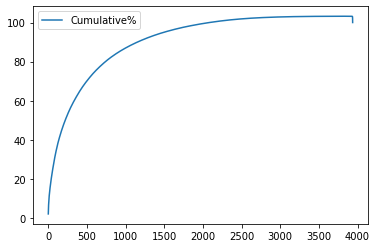

In [16]:
df111.plot(use_index=True, y='Cumulative%', kind = 'line')

In [17]:
# 1500th stock: Point of saturation
# THEREFORE we should consider till stock 1500 for optimum Revenue
# Negative revenue generating Stockcode will be eliminated

In [18]:
df2 = df.groupby(['StockCode','inMonth'])['Quantity'].sum().reset_index()

df2 = df2.pivot_table(columns='inMonth',index='StockCode',values='Quantity', fill_value=0)

cl2 = df2.columns.tolist()

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,inMonth,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [21]:
df2['Quantity_Total'] = df2[cl2].sum(axis=1)

In [22]:

df2['%_of_TotalQuantity'] = df2['Quantity_Total']*100/df2['Quantity_Total'].sum()

df2['Quantity_MonthlyAvg'] = df2[cl2].mean(axis=1)
df2['Quantity_Median'] = df2[cl2].median(axis=1)

df2 = df2.sort_values('Quantity_Total',ascending=False)

In [23]:
df2['Quantity_Cumulative%'] = df2['%_of_TotalQuantity'].cumsum()

In [24]:
df2
### Some of the StockCodes have negative totalQuantity
### these will be filtered out when we will choose the best revenue generating stockcodes

inMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,Quantity_Total,%_of_TotalQuantity,Quantity_MonthlyAvg,Quantity_Median,Quantity_Cumulative%
StockCode,,,,,,,,,,,,,,,,,,
22197,2731,1809,2663,2798,1856,6848,2092,1862,5416,4153,5865,12159,6198,56450,1.062928,4342.307692,2798.0,1.062928
84077,5195,1492,3518,3888,10143,3893,2122,3714,2261,3515,8180,4559,1367,53847,1.013915,4142.076923,3714.0,2.076843
85099B,2125,2639,3078,5279,2452,3617,3675,3126,5401,4267,4803,5807,1090,47359,0.891749,3643.000000,3617.0,2.968591
84879,2371,1771,1667,2649,2560,3059,1540,1844,6552,3048,2736,5254,1330,36381,0.685038,2798.538462,2560.0,3.653629
21212,4076,3409,2095,3975,2972,3465,1864,2784,3014,3278,2023,2625,459,36039,0.678598,2772.230769,2972.0,4.332227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRUK,0,0,0,0,0,0,0,0,-1,-5,-5,-4,-1,-16,-0.000301,-1.230769,0.0,100.024610
21645,0,-24,0,0,0,0,0,0,0,0,0,0,0,-24,-0.000452,-1.846154,0.0,100.024158
AMAZONFEE,-5,-2,-2,-2,0,-2,-2,-2,-4,-2,-3,-2,-2,-30,-0.000565,-2.307692,-2.0,100.023593


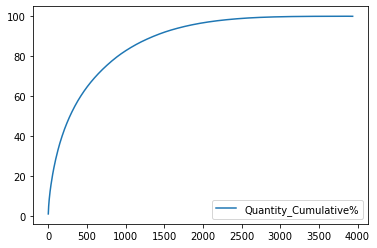

In [25]:
df222 = df2.reset_index()
df222.plot(use_index=True, y='Quantity_Cumulative%', kind = 'line')

In [26]:
# Top 1000 selling Product consist of 80% of Total Quantity

In [27]:
df22 = df2[['Quantity_Total', '%_of_TotalQuantity',
       'Quantity_MonthlyAvg', 'Quantity_Median', 'Quantity_Cumulative%']]

df11 = df1[['TotalRevenue', '%_of_TotalRevenue', 'MonthlyAvg', 'Median',
       'Cumulative%']]

df3 = df11.join(df22)

In [28]:
#### Creating a metric named Space Effectiveness, which will indicate amount of revenue generation per unit space
#### assumption: all the products consumes same amount of room/space

df31 = df3[['TotalRevenue', '%_of_TotalRevenue','Quantity_Total', '%_of_TotalQuantity']]
df31['SpaceEffectiveness'] = df31['%_of_TotalRevenue']/df31['%_of_TotalQuantity']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df31 = df31[(df31['%_of_TotalQuantity'] > 0) & (df31['%_of_TotalRevenue'] > 0)]

In [30]:
df31 = df31.sort_values('SpaceEffectiveness',ascending=False)

In [31]:
df31

inMonth,TotalRevenue,%_of_TotalRevenue,Quantity_Total,%_of_TotalQuantity,SpaceEffectiveness
StockCode,,,,,
B,11062.060,1.132263e-01,1,0.000019,6013.222082
DOT,206245.480,2.111036e+00,705,0.013275,159.025422
84347,26142.230,2.675801e-01,100,0.001883,142.106474
22827,5000.000,5.117774e-02,32,0.000603,84.935894
22828,1530.000,1.566039e-02,10,0.000188,83.169227
...,...,...,...,...,...
16218,283.310,2.899833e-03,3821,0.071948,0.040305
16216,234.000,2.395118e-03,3333,0.062759,0.038164
18007,395.610,4.049285e-03,5884,0.110793,0.036548


In [32]:
# We will pick Stocks which have greater SpaceEffectiveness

In [33]:
df31['CumulativeRevenue %'] = df31['TotalRevenue'].cumsum()*100/df31.TotalRevenue.sum()
df31['CumulativeQuantity %'] = df31['Quantity_Total'].cumsum()*100/df31.Quantity_Total.sum()

In [46]:
df31.head(3400)

inMonth,TotalRevenue,%_of_TotalRevenue,Quantity_Total,%_of_TotalQuantity,SpaceEffectiveness,CumulativeRevenue %,CumulativeQuantity %
StockCode,,,,,,,
B,11062.06,0.113226,1,0.000019,6013.222082,0.109697,0.000019
DOT,206245.48,2.111036,705,0.013275,159.025422,2.154926,0.013298
84347,26142.23,0.267580,100,0.001883,142.106474,2.414165,0.015182
22827,5000.00,0.051178,32,0.000603,84.935894,2.463748,0.015784
22828,1530.00,0.015660,10,0.000188,83.169227,2.478920,0.015973
...,...,...,...,...,...,...,...
90214T,13.46,0.000138,24,0.000452,0.304863,95.337495,76.974943
72134,58.62,0.000600,105,0.001977,0.303478,95.338076,76.976921
82581,2144.73,0.021952,3862,0.072720,0.301878,95.359345,77.049665


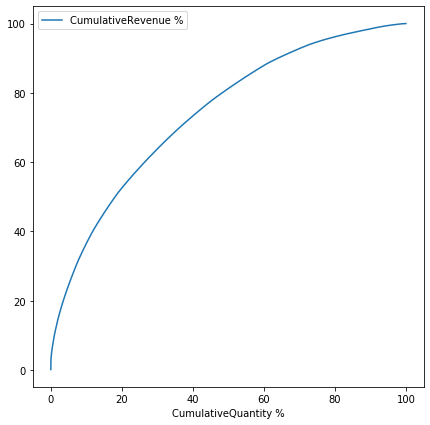

In [35]:
df31.plot(x ='CumulativeQuantity %', y='CumulativeRevenue %', kind = 'line',figsize=(7,7))

In [36]:
# Observations
# If we optimise our storage accoring to the above dataframe uk31
# 63% of total storage can bring 90%+ revenue
# 77% of total storage can bring 95%+ revenue

In [37]:
optimised = df31.head(3400)

In [70]:
#optimised

## 2. How much quantity of SELECTED PRODUCTS should we store on monthly basis.

In [38]:
# Following analysis is done after selecting top 77% of the stocks from dataframe optimised

In [39]:
cl = ['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12',]

In [40]:
quant = df2[['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12','Quantity_MonthlyAvg', 'Quantity_Median']].join(optimised[['TotalRevenue','Quantity_Total']])
quant = quant[quant['TotalRevenue'].notnull()]

In [43]:
quant['Previous 3 Month Average'] = quant[[ '2011-10', '2011-11','2011-12']].sum(axis=1)/3

In [71]:
quant = quant.sort_values('TotalRevenue',ascending=False).round()

In [ ]:
# How much quantity of SELECTED PRODUCTS should we store on monthly basis?
# Previous 3 Months avrage

In [72]:
Q1 = quant[['TotalRevenue','Previous 3 Month Average']]

In [ ]:
#### Some of the StockCodes' average is Zero, we can do 2 things here
#### 1. exclude these products from our inventry(Optimised )
#### 2. or keep 1 product for each stockcode (Optimistic approach)

In [74]:
Q1[Q1['Previous 3 Month Average'] > 0]

inMonth,TotalRevenue,Previous 3 Month Average
StockCode,,
DOT,206245.0,35.0
22423,164762.0,812.0
47566,98303.0,535.0
85123A,97894.0,2468.0
85099B,92356.0,3900.0
...,...,...
47593b,5.0,2.0
84971l,5.0,1.0
79157V,4.0,2.0
